In [11]:
#Definición de paths y directorios
path = './'
dir_train = 'dataset/train'
dir_validation = 'dataset/validation'
dir_test = 'dataset/test'

#Importaciones
import os
os.chdir(path)
from utiles import plot_img
from utiles import draw_history
from utiles import graficar_sets
from utiles import resize_scuare

from tensorflow.keras.preprocessing import image
import numpy as np

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
import tensorflow.keras as keras

from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt


In [12]:
#Definición de parámetros

#lote de datos
num_labels = 10
image_size = 100 

#Parámetros augmentation
rotation_range = 5              #grados de rotacion aleatoria
width_shift_range = 0.1         #desplazamiento horizontal
height_shift_range = 0.1        #desplazamiento vertical
zoom_range = 0.1                #[1-zoom_range, 1+zoom_range]
brightness_range = [0.5, 1.0]
fill_mode = 'nearest' 
horizontal_flip = True
vertical_flip = False

view_samples = True
row_samples = 3                #filas de ejemplos (una columna por lote trai,val,test)
size_samples = 25              #tamaño de cada imagen

#Modelo
input_shape = (image_size, image_size, 3)
num_labels = 10                 #Fijo! son 10 números del 0 al 9 (10 clases)
pool_size = 2
dropout = 0.2
#Filtros para 3 capas convolucionales (en orden)
filters = [64, 64, 64]
kernel_sizes = [3, 3, 3]    


#Compilación y Entrenamiento
batch_size = 128
epochs = 20

view_graph = True

#test
verbose=1

#Guardar modelo (dejar vacío para no guardar)
savefile_model = "" #"modelo_sings_01.h5"
savefile_diagram = "sing01-00.png" #""

In [13]:
# creo generador de augmentation teniendo en cuenta que
# son imágenes de manos.
datagen = image.ImageDataGenerator(
    rotation_range = rotation_range ,
    width_shift_range = width_shift_range ,
    height_shift_range = height_shift_range ,
    zoom_range = zoom_range ,
    brightness_range = brightness_range ,
    fill_mode = fill_mode ,
    horizontal_flip = horizontal_flip ,
    vertical_flip = vertical_flip 
)

it_train = datagen.flow_from_directory(
    path+dir_train, 
    shuffle = True,
    target_size = (image_size,image_size),
    batch_size = 1,
    class_mode = 'categorical',
)

it_validation = datagen.flow_from_directory(
    path+dir_validation, 
    shuffle = True,
    target_size = (image_size,image_size),
    class_mode = 'categorical'
)

it_test = datagen.flow_from_directory(
    path+dir_test, 
    shuffle = True,
    target_size = (image_size,image_size),
    class_mode = 'categorical'
)



Found 1726 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 136 images belonging to 10 classes.


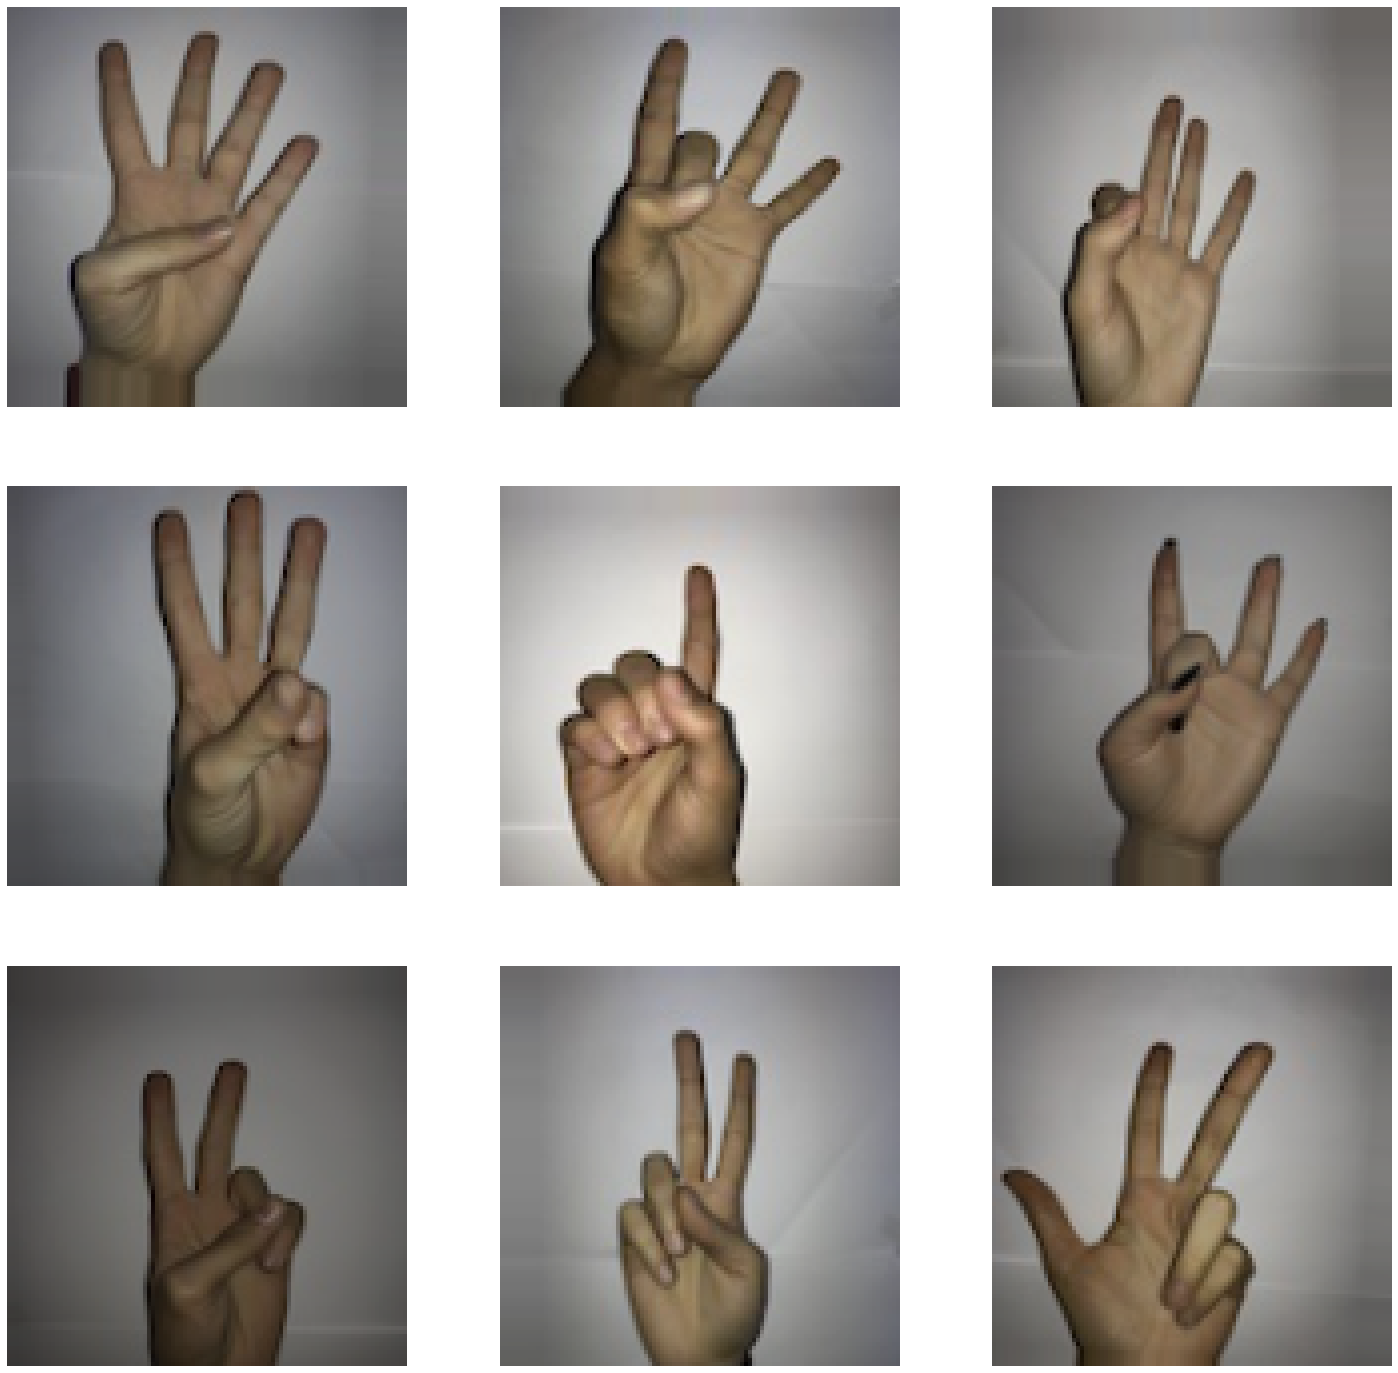

In [14]:
if view_samples:
    graficar_sets([it_train, it_validation, it_test], irows = row_samples, isize = size_samples)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 28224)            

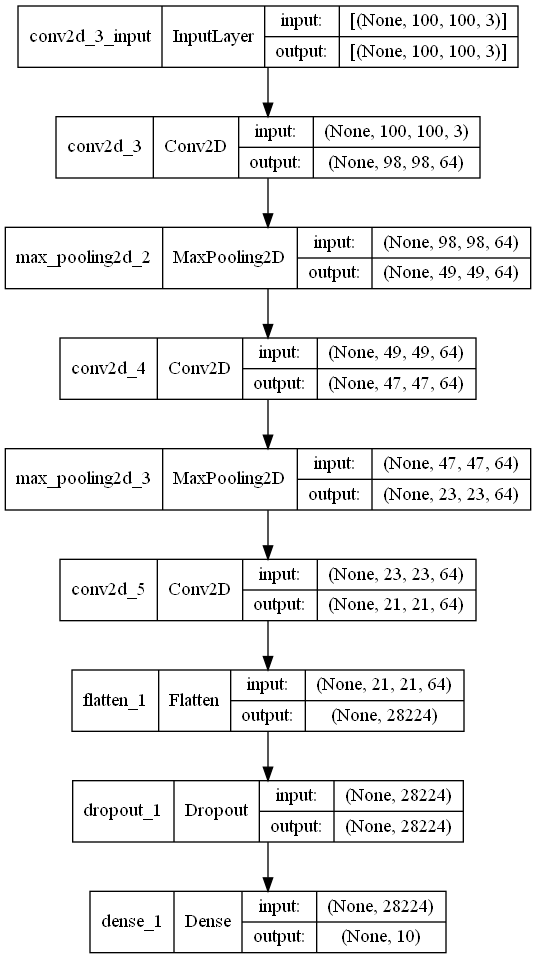

In [15]:
########################################### MODELO ###########################################
# CNN-ReLU-MaxPooling
model = Sequential()
model.add(
    Conv2D(
        filters=filters[0],
        kernel_size=kernel_sizes[0],
        activation='relu',
        input_shape=input_shape
    )
)
model.add(
    MaxPooling2D(pool_size)
)
model.add(
    Conv2D(
        filters=filters[1],
        kernel_size=kernel_sizes[1],
        activation='relu'
    )
)
model.add(
    MaxPooling2D(pool_size)
)
model.add(
    Conv2D(
        filters=filters[2],        
        kernel_size=kernel_sizes[2],
        activation='relu'
    )
)
model.add(
    Flatten()
)
model.add(
    Dropout(dropout)
)
model.add(
    Dense(
        num_labels, 
        activation="softmax"
    )
)

model.summary()
plot_model(model, to_file=savefile_diagram, show_shapes=True)


In [16]:
########################################### COMP & FIT ###########################################
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'] 
)

history = model.fit(
    it_train,
    epochs=epochs, 
    batch_size=batch_size,
    shuffle=True, 
    validation_data=it_validation    
)



Epoch 1/20
1726/1726 [==============================] - 18s 10ms/step - loss: 2.9451 - accuracy: 0.0915 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/20
1726/1726 [==============================] - 19s 11ms/step - loss: 2.5414 - accuracy: 0.1031 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/20
1726/1726 [==============================] - 18s 11ms/step - loss: 2.3039 - accuracy: 0.0881 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/20
1726/1726 [==============================] - 17s 10ms/step - loss: 2.3039 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/20
1726/1726 [==============================] - 18s 10ms/step - loss: 2.3039 - accuracy: 0.0898 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/20
1726/1726 [==============================] - 18s 10ms/step - loss: 2.3039 - accuracy: 0.0950 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
1726/1726 [==============================] - 18s 10ms/step - loss: 2.3039 - accuracy: 0.0927 - val_loss: 2.3027 -

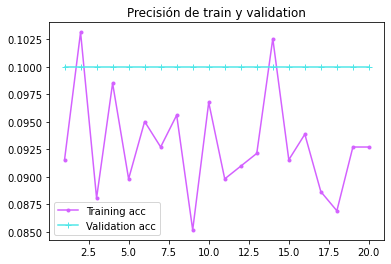

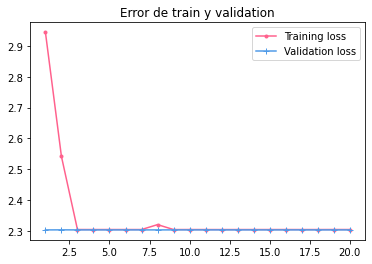

In [21]:
if view_graph:
    draw_history(history)

In [18]:
#Test
loss_test, acc = model.evaluate(
        it_test,
        batch_size=batch_size,
        verbose=verbose
        ) 

print("\nTest accuracy: %.1f%%" % (100.0 * acc))  

5/5 [==============================] - 1s 214ms/step - loss: 2.3034 - accuracy: 0.0735

Test accuracy: 7.4%


In [19]:
if savefile_model != "":
    model.save(path+savefile_model)

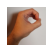

Predicción:  7


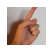

Predicción:  7


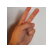

Predicción:  7


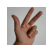

Predicción:  7


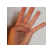

Predicción:  7


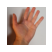

Predicción:  7


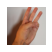

Predicción:  7


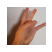

Predicción:  7


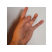

Predicción:  7


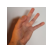

Predicción:  7


In [20]:
#meta test

imgs = [
    "dataset/meta_test/0/cero.jpg",
    "dataset/meta_test/1/uno.jpg",
    "dataset/meta_test/2/dos.jpg",
    "dataset/meta_test/3/mimano.jpg",
    "dataset/meta_test/4/cuatro.jpg",
    "dataset/meta_test/5/cinco.jpg",
    "dataset/meta_test/6/seis.jpg",
    "dataset/meta_test/7/siete.jpg",
    "dataset/meta_test/8/ocho.jpg",
    "dataset/meta_test/9/nueve.jpg"
]


for manofile in imgs:
    mano = image.load_img(path+manofile) 
    mano_c = resize_scuare(mano, btype='zoom', size=image_size)
    plot_img(mano_c)
    mano_np = np.array(mano_c).reshape(1,image_size,image_size,3)

    prediction = model.predict(mano_np)
    print ('Predicción: ',np.argmax(prediction))